Импорт необходимых библиотек.

In [ ]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from numpy import genfromtxt
import sys

Раздел с предложенными функциями в программе, которые выбирает пользователь для решения.

In [ ]:
def function1(x):
    return -1.8 * x ** 3 - 2.94 * x ** 2 + 10.37 * x + 5.38

def function1_first_derivative(x):
    return -5.4 * x ** 2 - 5.88 * x + 10.37

def function1_second_derivative(x):
    return -10.8 * x - 5.88

def function2(x):
    return math.sin(x) + 0.1

def function2_first_derivative(x):
    return math.cos(x)

def function2_second_derivative(x):
    return -math.sin(x)

def function3(x):
    return x ** 3 - x + 4

def function3_first_derivative(x):
    return 3 * x ** 2

def function3_second_derivative(x):
    return 6 * x

def f1(x1, x2):
    return (0.3 - 0.1 * x1 ** 2 - 0.2 * x2 ** 2 - x1)

def f1_derivative_a(x1, x2):
    return (-0.2 * x1)

def f1_derivative_b(x1, x2):
    return (-0.4 * x2)

def f2(x1, x2):
    return (0.7 - 0.2 * x1 ** 2 - 0.1 * x1 * x2 - x2)

def f2_derivative_a(x1, x2):
    return (-0.4 * x1  + 0.1 * x2)

def f2_derivative_b(x1, x2):
    return (0.1 * x1)

def system(x1, x2):
    return (0.3 - 0.1 * x1 ** 2 - 0.2 * x2 ** 2), (0.7 - 0.2 * x1 ** 2 - 0.1 * x1 * x2)

Методы для отрисовки графика.

In [ ]:
def newline(p1, p2, color = 'black'):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()
    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = color)
    ax.add_line(l)
    return l

def draw(a, b, Xs = [], func=function1):
    
    x = [a + i*(b-a)/10000 for i in range(10000)]
    y = []
    for xx in x:
        y.append(func(xx))
    plt.plot(x, y)
    for xx in Xs:
        plt.scatter(xx, 0, color = 'red')
    p1 = [min(x), 0]
    p2 = [max(x), 0]
    p3 = [0, min(y)]
    p4 = [0, max(y)]
    newline(p1,p2, color = 'black')
    newline(p3,p4, color = 'black')

    plt.show()

def draw_system(a, b, Xs = [], Ys = [], fun1=f1, fun2=f2):
    
    x = [a + i*(b-a)/10000 for i in range(10000)]
    y = []
    for xx in x:
        y.append(fun1(0, xx))
    
    plt.plot(y, x)

    y = [a + i*(b-a)/10000 for i in range(10000)]
    x = []
    for yy in y:
        x.append(fun2(yy, 0))

    plt.plot(y, x)
    
    for i in range(0, len(Xs)):
        plt.scatter(Xs[i], Ys[i], color = 'red')
    
        # draw axes
    p1 = [min(x), 0]
    p2 = [max(x), 0]
    p3 = [0, min(y)]
    p4 = [0, max(y)]
    newline(p1,p2, color = 'black')
    newline(p3,p4, color = 'black')

    plt.show()

Функция для проверки смены знака на заданном участке, принимает границы интревала и названия метода.

In [ ]:
def check_sign(a, b, method = '', func=function1):
    if func(a) * func(b) > 0:
        raise ValueError(f'Ошибка вычисления методом {method}:\nВ веденном интервале должен располагаться ровно 1 корень, и значения на концах должны быть разных знаков!')
    start = np.sign(func(a))
    changing = 0
    for i in range(1, 1001):
        x = a + i*(b-a)/1000
        f = func(x)
        if np.sign(f) != start:
            start = np.sign(f)
            changing +=1
    if changing != 1:
        raise ValueError(f'Ошибка вычисления методом {method}:\nВ введенном интервале смена знака происходит не 1 раз!')

Реализация метода Ньютона.

In [ ]:
def newtone(a, b, eps, f=function1, f_first_derivative=function1_first_derivative, f_second_derivative=function1_second_derivative):
    if b < a:
        a, b = b, a
        
    check_sign(a, b, 'Ньютона', f)
    x = 0
    if f(a) * f_second_derivative(a) > 0:
        x = a
    elif f(b) * f_second_derivative(b) > 0:
        x = b
    else:
        raise ValueError('Ошибка вычисления Ньютона:\nНе сходится.')
    
    n = 0
    while n<1 or (abs(f(x)/f_first_derivative(x)) > eps or abs(f(x)) > eps):
        n += 1
        x -= f(x)/f_first_derivative(x)
    return x, n

Реализация метода простых итераций.

In [ ]:
def iterations(a, b, eps, f=function1, f_first_derivative=function1_first_derivative):
    try:
        if b < a:
            a, b = b, a
        check_sign(a, b, 'простых итераций', f)
        x = 0
        for i in range(1, 1001):
          x = a + i/1000 * (b-a)
  
        lambda_value = -1/max(f_first_derivative(a), f_first_derivative(b))
        n = 0
        x = a if f_first_derivative(a) > f_first_derivative(b) else b
        while abs(f(x)) > eps:
            n += 1
            x_prev = x
            x += lambda_value * f(x)
        return x, n
    except OverflowError:
        raise ValueError('Ошибка методом вычисления простой итерации:\nНе cходится, или необходимо слишком много итераций.')

Функция для системы:

In [ ]:
def iteration_for_system(eps):
    a = f1_derivative_a(1, 1)
    b = f1_derivative_b(1, 1)
    c = f2_derivative_a(1, 1)
    d = f2_derivative_b(1, 1)
   
    if(abs(a)+abs(b)<1 and abs(c)+abs(d)<1):
        print("Сходимость есть, решаем...")
    else:
        raise ValueError('Ошибка методом вычисления простой итерации:\nНе cходится.')
    iterations = 1
    equation_1_previous, equation_2_previous = system(-3, -3)
    equation_1_current, equation_2_current = system(equation_1_previous, equation_2_previous)
    while (abs(abs(equation_1_current) - abs(equation_1_previous))>eps or abs(abs(equation_2_current) - abs(equation_2_previous))>eps):
        iterations += 1
        equation_1_previous = equation_1_current
        equation_2_previous = equation_2_current
        equation_1_current, equation_2_current = system(equation_1_previous, equation_2_previous)
    residuals_1 = abs(equation_1_current - equation_1_previous)
    residuals_2 = abs(equation_2_current - equation_2_previous)
    return equation_1_current, equation_2_current, iterations, residuals_1, residuals_2

Функция для считывания данных и преобразования во float.

In [ ]:
def in_float(s = ''):
    should_continue = True
    while should_continue:
        should_continue = False
        try:
            val = float(input('Введите значение ' + s +': '))
        except ValueError:
            should_continue = True
            print('Попробуйте снова!\n')
    return val

Функция "parse" отвечает за парсинг данных из файла.

In [ ]:
def parse():
    should_continue = True
    while should_continue:
        path = input('Введите путь:\n')
        try:
            a, b, eps = genfromtxt(path, delimiter=',')
            a = float(a)
            b = float(b)
            eps = float(eps)
            return a, b, eps
        except ValueError:
            print('В файле должно быть 3 числа, все через запятую.\n')
        except OSError:
            print('Такого файла нет.\n')
        print('Попробуйте снова!\n')

Функция для подсчета системы:

In [ ]:
def calculate_nonlinear_equation():
  again = True
  f = function1
  f_first_derivative = function1_first_derivative
  f_second_derivative = function1_second_derivative
  while again:
        again = False
        in_type = input('Выберите уравнение:\n\t 1 - -1.8*x^3-2.94*x^2+10.37*x+5.38\n\t 2 - sin(x)+0.1\n\t 3 - x^3-x+4\n\t')
        if in_type.strip() == '1':
            f = function1
            f_first_derivative = function1_first_derivative
            f_second_derivative = function1_second_derivative
        elif in_type.strip() == '2':
            f = function2
            f_first_derivative = function2_first_derivative
            f_second_derivative = function2_second_derivative
        elif in_type.strip() == '3':
            f = function3
            f_first_derivative = function3_first_derivative
            f_second_derivative = function3_second_derivative
        else:
            print('Введено неверно, попробуйте снова.')
            again = True
  again = True
  draw(-5, 5, [], f)
  while again:
        again = False
        in_type = input('Введите:\n\t k - вводить с клавиатуры\n\t f - вводить из файла\n')
        if in_type.strip() == 'k':
            a = in_float('a')
            b = in_float('b')
            eps = in_float('eps')
        elif in_type.strip() == 'f':
            a, b, eps = parse()
        else:
            print('Введено неверно, попробуйте снова.')
            again = True
  again = True
  while again:
        again = False
        in_type = input('Выберите способ:\n\t n - метод Ньютона\n\t i - метод итераций\n\t q - выход\n')
        try:
            if in_type.strip() == 'n':
                x, n = newtone(a, b, eps, f, f_first_derivative, f_second_derivative)
            elif in_type.strip() == 'i':
                x, n = iterations(a, b, eps, f, f_first_derivative)
            if in_type.strip() == 'n' or in_type.strip() == 'i':
                print(f'Решено за {n} итераций\nX = {x}\nf(x) = {f(x)}\n График:\n')
                draw(-5, 5, [x], f)
            elif in_type.strip() == 'q':
                break
            else:
                raise ValueError('Введено неверно, попробуй снова.')
        except ValueError as err:
            print(err)
            again = True

Функция для взаимодействия с системой

In [ ]:
def calculate_nonlinear_system():
    again = True
    draw_system(-3, 3, [], [], f1, f2)
    while again:
        again = False
        in_type = input('Введите:\n\t k - вводить с клавиатуры\n\t f - вводить из файла\n')
        if in_type.strip() == 'k':
            eps = in_float('eps')
        elif in_type.strip() == 'f':
            eps = parse()
        else:
            print('Введено неверно, попробуйте снова.')
            again = True
    x1, x2, n, res1, res2 = iteration_for_system(eps)
    print(f'Решено за {n} итераций\nX1 = {x1}\nX2 = {x2}\n Погрешности: {res1}, {res2} \n График:\n')
    draw_system(-3, 3, [x1], [x2], f1, f2)

Метод, запускающий программу.

In [ ]:
def run():
    again = True
    while again:
        again = False
        in_type = input('Что считаем:\n\t 1 - уравнение\n\t 2 - систему\n')
        if in_type.strip() == '1':
            calculate_nonlinear_equation()
        elif in_type.strip() == '2':
            calculate_nonlinear_system()
        else:
            print('Введено неверно, попробуйте снова.')
            again = True
    again = True

Что считаем:
	 1 - уравнение
	 2 - систему
2


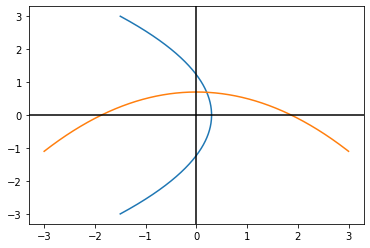

Введите:
	 k - вводить с клавиатуры
	 f - вводить из файла
k
Введите значение eps: 0.01
Сходимость есть, решаем...
Решено за 6 итераций
X1 = 0.20336259305918464
X2 = 0.6772908348386247
 Погрешности: 0.004132174510114273, 0.0021648262752982372 
 График:



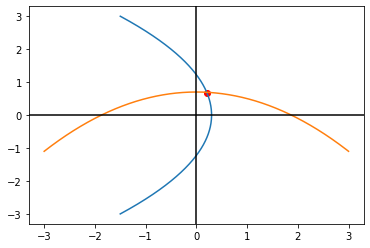

In [ ]:
run()